In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# Задача №1

Зададим **x** и вычислим **y** и построим графики функции. Используем библиотеки **matplotlib**, **seaborn** и **plotly**.

In [2]:
# Составим функцию для построения графиков различными библиотеками

def graphic_libs(x, graphic_type):

    """
    Функция на вход получает аргумент х и тип графика.
    Рассчитывает у по формуле.
    Строит график в зависимости от выбранного типа графика.

    Типы графиков:
    1. matplotlib - использует библиотеку matplotlib для построения графика
    2. seaborn - использует библиотеку seaborn для построения графика
    3. plotly_express - использует библиотеку plotly.express для построения графика
    4. plotly_graph_objects - использует библиотеку plotly.graph_objects для построения графика
    5. plotly_graph_objects_interactive - использует библиотеку plotly.graph_objects и добавляет интерактивный слайдер

    """

    y = np.cos(20*x) / (x+0.1)

    if graphic_type == 'matplotlib':

        plt.plot(x, y) # Создаем график с использованием данных из списков x и y
        plt.xlabel('значение х') # Добавляем подпись оси X
        plt.ylabel('значение функции y') # Добавляем подпись оси Y
        plt.title('График зависимости y от x')  # Добавляем заголовок графика
        plt.grid() # Добавляем сетку
        plt.show() # Отображаем график на экране

    elif graphic_type == 'seaborn':

        # Рассмотрим разные стили (style) осей:
        # darkgrid (серый фон с сеткой),
        # whitegrid (белый фон с сеткой),
        # dark (серый фон без сетки),
        # white (белый фон без сетки).

        plt.figure(figsize=(12, 12))
        for i, style in enumerate(['darkgrid', 'whitegrid', 'dark', 'white']):
            sns.set_theme(style=style)  # Устанавливаем стиль
            plt.subplot(2, 2, i+1)
            plt.plot(x, y)
            plt.xlabel('значение х')
            plt.ylabel('значение функции y')
            plt.title(f'График зависимости y от x, стиль - {style}')

    elif graphic_type == 'plotly_express':

        fig=px.line(x=x, y=y, title='График зависимости y от x')
        fig.show()

    elif graphic_type == 'plotly_graph_objects':
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=x, y=y, mode='lines',))

        fig.update_layout(title="График зависимости y от x",
                        xaxis_title="значение х",
                        yaxis_title="значение функции y")
        # при наведении на график выводятся подписанные данные
        fig.update_traces(hoverinfo="all", hovertemplate="Аргумент x: %{x}<br>Функция y: %{y}")
        fig.show()

    elif graphic_type == 'plotly_graph_objects_interactive':

        num_steps = len(x)
        trace_list = [go.Scatter(visible=True, x=[x[0]], y=[y[0]], mode='lines')]

        for i in range(1, len(x)):
            trace_list.append(go.Scatter(visible=False, x=x[:i+1], y=(y[:i+1]), mode='lines'))

        fig = go.Figure(data=trace_list)


        fig.update_layout(title="График зависимости y от x",
                          xaxis_title="значение х",
                          yaxis_title="значение функции y")

        steps = []
        for i in range(num_steps):
            step = dict(
                method = 'restyle',
                args = ['visible', [False] * len(fig.data)],
        )
            step['args'][1][i] = True
            steps.append(step)

        sliders = [dict(steps = steps)] # формируем слайдер
        fig.layout.sliders = sliders
        fig.show()

    else:
        print('Invalid function arguments') # Если тип графика введен с ошибкой


In [3]:
# Зададим значение аргумента х
x = np.arange(0, 4.01, 0.01)

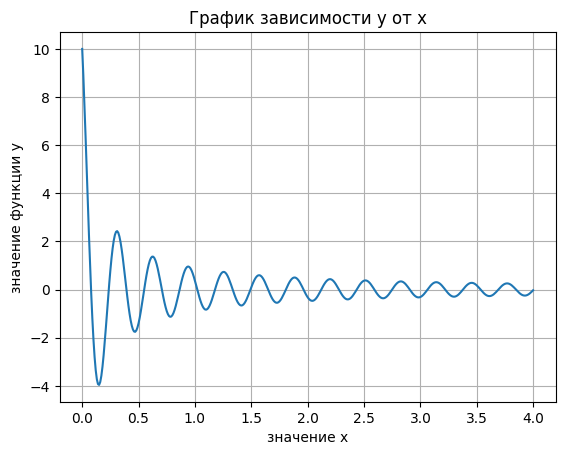

In [4]:
# Библиотека matplotlib
df_matplotlib = graphic_libs(x, graphic_type="matplotlib")

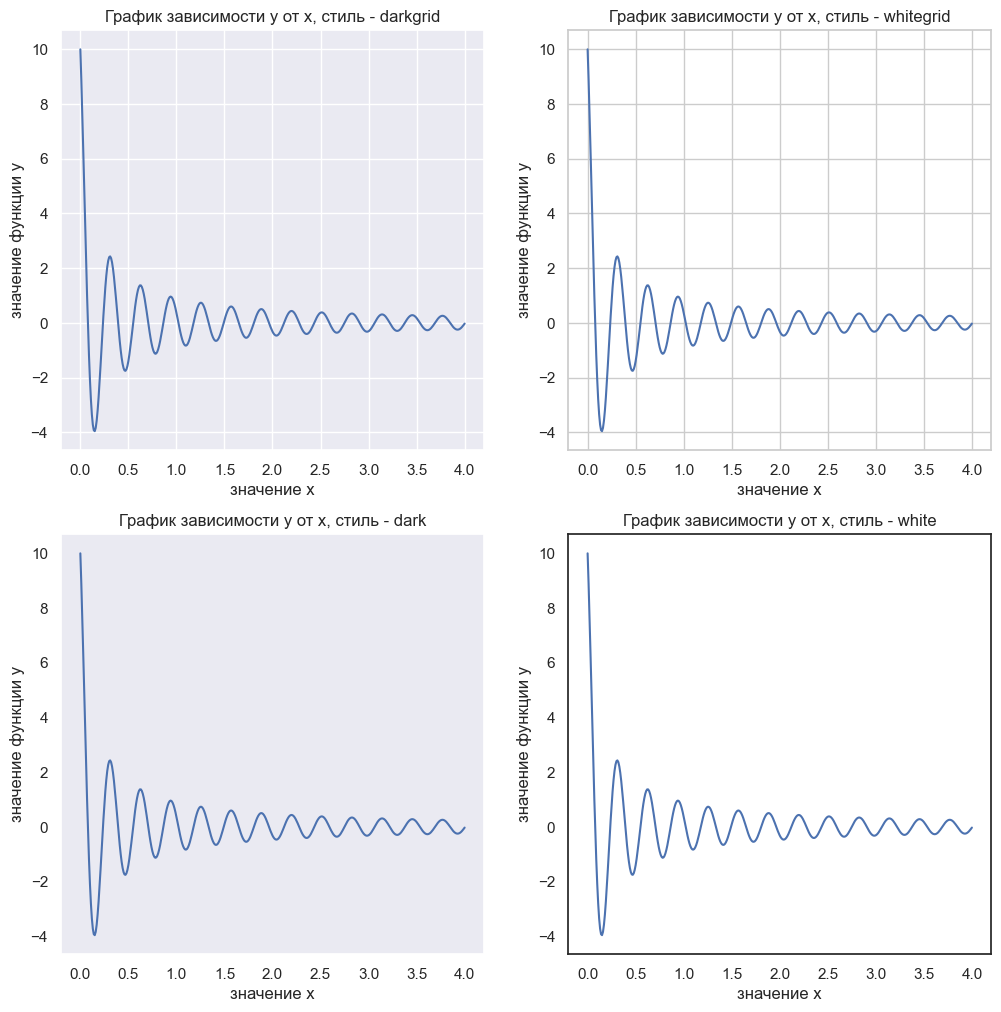

In [5]:
# Библиотека seaborn
df_seaborn = graphic_libs(x, graphic_type="seaborn")

In [6]:
# Библиотека plotly.graph_objects
df_plotly_graph_objects = graphic_libs(x, graphic_type="plotly_graph_objects")

**Так как на GitHub графики не отображаются, сюда добавлю скриншоты графиков**
![График plotly.graph_objects](Plotly_graph_objects_.jpg)

In [7]:
# Библиотека plotly.graph_objects
df_plotly_graph_objects_int = graphic_libs(x, graphic_type="plotly_graph_objects_interactive")

**Cкриншот графика для GitHub**

![График plotly.graph_objects_interact](Plotly_graph_objects_interact.jpg)

In [8]:
# Библиотека plotly.express
df_plotly_express = graphic_libs(x, graphic_type="plotly_express")

**Cкриншот графика для GitHub**
![График plotly.express](Plotly_express.jpg)

In [9]:
# И если неверно ввести аргументы функции выходит предупреждение
df_error = graphic_libs(x, graphic_type="errors")

Invalid function arguments


# Задача №2

Необходимо сформировать и отобразить данные в виде трех разных графиков:
1. С использованием диаграммы boxplot визуализируйте зависимость числового признака от категориального. Ящики в диаграмме визуализировать горизонтально.Используйте библиотеку seaborn или plotly.
2. Постройте Scatterplot для двух числовых признаков из набора данных,отметив разными цветами категориальный признак. Использовать любую из библиотек: matplotlib, seaborn, plotly.
3. Постройте диаграмму Countplot для нескольких категориальных признаков(минимально взять 2 признака) из набора данных. Используйте библиотеку seaborn или plotly.

In [10]:
try:
    df = pd.read_csv('car_data.csv')
    print("Successful read the local file")
except :
    df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/' \
                     '2PACX-1vQLvJLKmpQisMKLX_RH1_3-ZRu3OpTXa7lPpYjRgPbRUGhw1QaMHz3zK12ZfB26kjElewKKVrecoRq_/pub?output=csv') # ссылка на файл car_data.csv на гугл диске.
    print("Successful read the web file")

df.head()

Successful read the local file


Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)   Dealer_No  \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000  60504-7114   
2          Overhead Camshaft       Manual         Red      31500  38701-8047   
3          Overhead Camshaft       Manual  Pale White      14000  99301-3882   
4  DoubleÂ Overhead Camshaft         Auto         Red      24500  53546-9427   

  Body Style    Phone Dealer_Region  
0        SUV  8264678    Middletown  
1        SUV  6848189        Aurora  
2  Passenger  7298798    Greenville  
3        SUV  6257557         Pasco  
4  Hatchback  7081483    Janesville

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         5001 non-null   object
 1   Date           5001 non-null   object
 2   Customer Name  5001 non-null   object
 3   Gender         5001 non-null   object
 4   Annual Income  5001 non-null   int64 
 5   Dealer_Name    4929 non-null   object
 6   Company        4929 non-null   object
 7   Model          5001 non-null   object
 8   Engine         5001 non-null   object
 9   Transmission   5001 non-null   object
 10  Color          5001 non-null   object
 11  Price ($)      5001 non-null   int64 
 12  Dealer_No      5001 non-null   object
 13  Body Style     5001 non-null   object
 14  Phone          5001 non-null   int64 
 15  Dealer_Region  5001 non-null   object
dtypes: int64(3), object(13)
memory usage: 625.3+ KB


## Boxplot и histplot

Визуализируем зависимость числового признака от категориального

In [12]:
# Напишем функцию для построения графиков
def graph_hist_and_box(data, data_label, num_bins, hue=None, log_scale=False):

    """
    Функция на вход получает
    - data - исходный датафрейм,
    - data_label - названия столбцов (количественных),
    - num_bins - число бинов для histplot,
    - hue - название столбца (категориального) для расчета зависимостей

    На выходе получаем графики, построенные библиотекой seaborn:
    - histplot - Distribution density (Плотность распределения)
    - Boxplot ("Ящик с усами")

    """
    sns.set_theme()
    f, axes = plt.subplots(1, 2, figsize=(16, 4))

    axes[0].set_title(data_label + ". Distribution density", fontsize=18)
    axes[0].set_ylabel('Density', fontsize=15)

    sns.histplot(data=df, x=data_label, bins=num_bins,  ax=axes[0], hue=hue, palette='pastel', stat='density', kde=True)

    axes[1].set_title(data_label + ". Boxplot", fontsize=18)
    axes[1].set(xlabel=data_label, ylabel=hue)

    sns.boxplot(data=df, x=data_label, y=hue, orient="h", ax=axes[1], palette='pastel') # условие задачи - ящики должны быть горизонтальными

    plt.show()

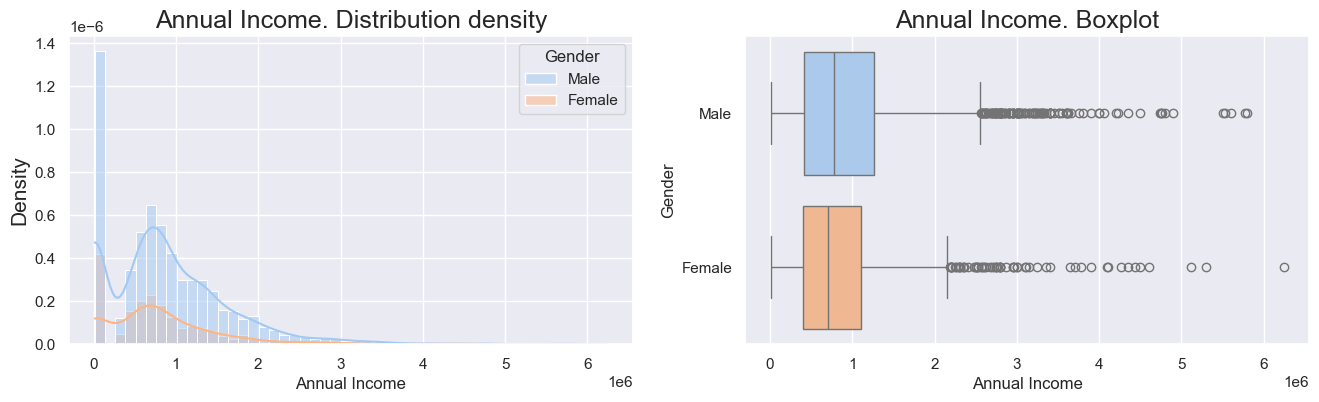

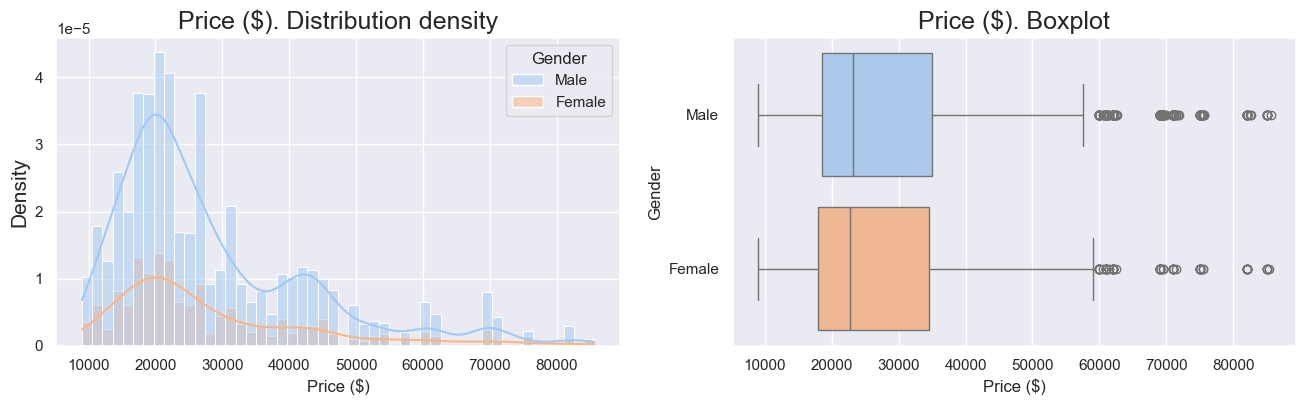

In [13]:
# построим графики
columns_name = ['Annual Income', 'Price ($)']
for name in columns_name:
    graph_hist_and_box(df[name], name, num_bins=50, hue='Gender')

Небольшой вывод по графикам: Видим, что как среди женщин, так и среди мужчин имеются заметные выбросы данных. Это не критично, так как и *Годовой доход (Annual Income)* и *Цена автомобиля (Price ($))* могут быть разными у разных людей и автомобилей соответственно.

## Scatterplot

Построим график зависимости Цены автомобиля от Годового дохода в разрезе данных того, какую коробку передач предпочитают - Автомат или Ручную. Используем библиотеку **seaborn**

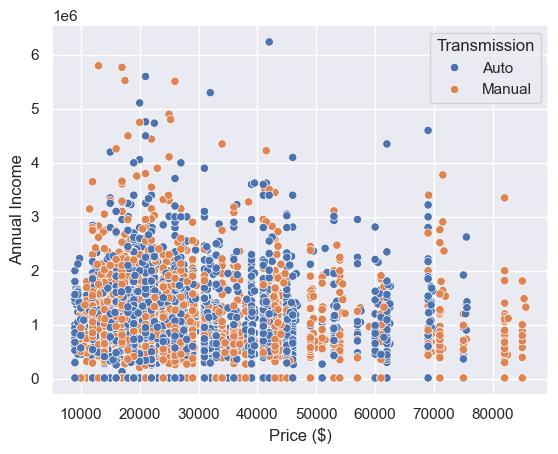

In [14]:
sns.scatterplot(data=df, x="Price ($)", y="Annual Income", hue="Transmission");


Тот же самый график, но разделенный на Мужчин и Женщин.

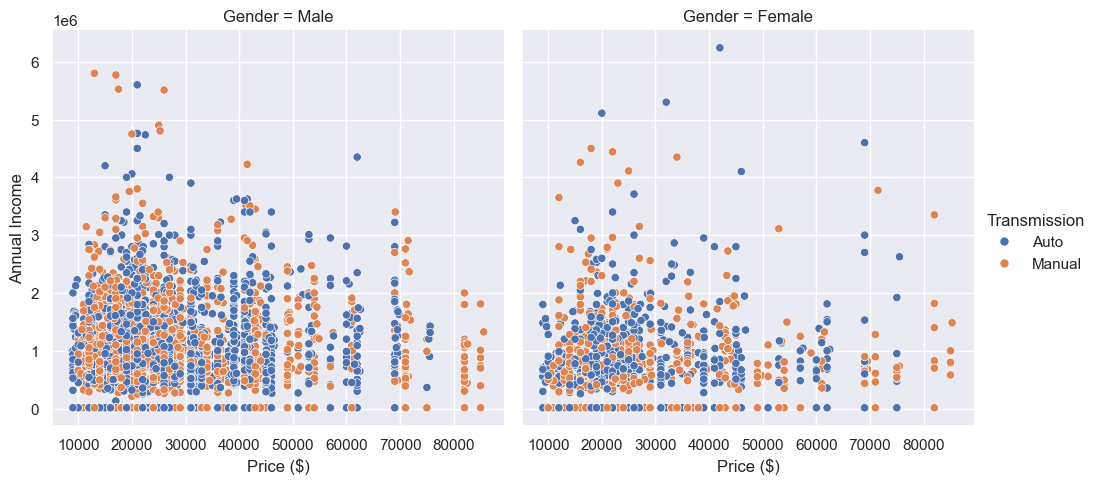

In [15]:
sns.relplot(
    data=df, x="Price ($)", y="Annual Income",
    col="Gender", hue="Transmission", kind="scatter"
);

Построим такие же графики, но с использованием библиотеки **plotly**

In [16]:
# Попробую на английском оставить комментарии (делаю после вкс от 14.11) :)
# Used plotly.graph_objects

fig = go.Figure()

# Add the scatter trace 1 - Transmission - Auto
fig.add_trace(go.Scatter(
    x=df[df['Transmission'] == 'Auto']['Price ($)'], name = 'Auto',
    y=df['Annual Income'],
    mode='markers',

    # Properties associated with points
    marker=dict(
        size=12, # Size
        color='blue', # Color
        opacity=0.8, # Point transparency
        line=dict(width=1, color='black') # Properties of the edges
    )
))

# Add the scatter trace 2 - Transmission - Manual
fig.add_trace(go.Scatter(
    x=df[df['Transmission'] == 'Manual']['Price ($)'], name = 'Manual',
    y=df['Annual Income'],
    mode='markers',

    # Properties associated with points
    marker=dict(
        size=12, # Size
        color='orange', # Color
        opacity=0.8, # Point transparency
        line=dict(width=1, color='black') # Properties of the edges
    )
))

# Customize the layout
fig.update_layout(
    title='Annual Income and Price', # Title
    xaxis_title='Price ($)', # x-axis name
    yaxis_title='Annual Income', # y-axis name
    width=1200,  # Set the width of the figure to 800 pixels
    height=600,  # Set the height of the figure to 600 pixels
)

# When you hover over the chart, signed data is display
fig.update_traces(hoverinfo="all", hovertemplate="Price ($): %{x}<br>Annual Income: %{y}")
fig.show()

**Cкриншот графика для GitHub**

![График](Scatter_plotly.jpg)

In [17]:
# Used plotly.express
fig = px.scatter(df,
                 x="Price ($)", y="Annual Income",
                 color="Transmission",
                 title="A Plotly Express Scatter - Annual Income and Price ($)")
fig.show()

**Cкриншот графика для GitHub**

![График plotly.express](Scatter_plotly_express.jpg)

## Countplot

In [18]:
# Напишем функцию для вывода countplot библиотеки seaborn

def graph_countplot(data, data_label1, data_label2=''):

  '''
  Функция на вход получает
   - data - исходный датафрейм,
  - data_label1 - названия столбцов (категориальных),
  - data_label2='' - названия столбцов (категориальных) (для работы функции)

  Классом выбираем столбец Gender.

  На выходе получаем графики, построенные библиотекой seaborn:
  - countplot - Количество по категориям

  '''

  sns.set_theme()
  f, axes = plt.subplots(1, 2, figsize=(16, 4))
  axes[0].set_title(data_label1 + ". Количество по категориям", fontsize=18)
  g = sns.countplot(data=data, x=data_label1,  hue='Gender', ax=axes[0], palette='pastel')
  g.set_xticklabels(g.get_xticklabels(), rotation=90)

  if data_label2 != '':
    axes[1].set_title(data_label2 + ". Количество по категориям", fontsize=18)
    g = sns.countplot(data=data, x=data_label2, hue='Gender', ax=axes[1], palette='pastel')
    g.set_xticklabels(g.get_xticklabels(), rotation=90)

  plt.show()

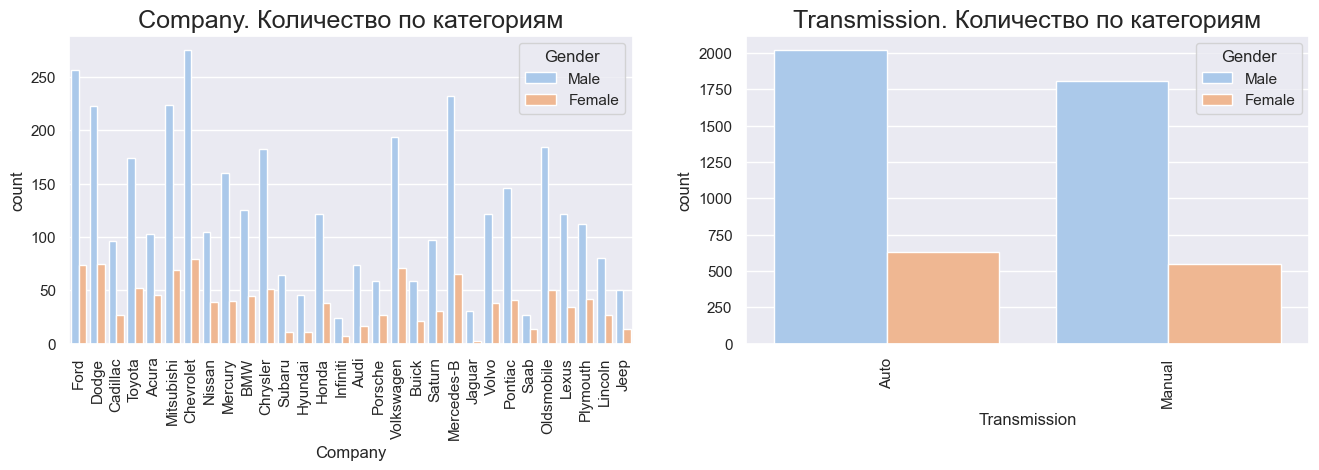

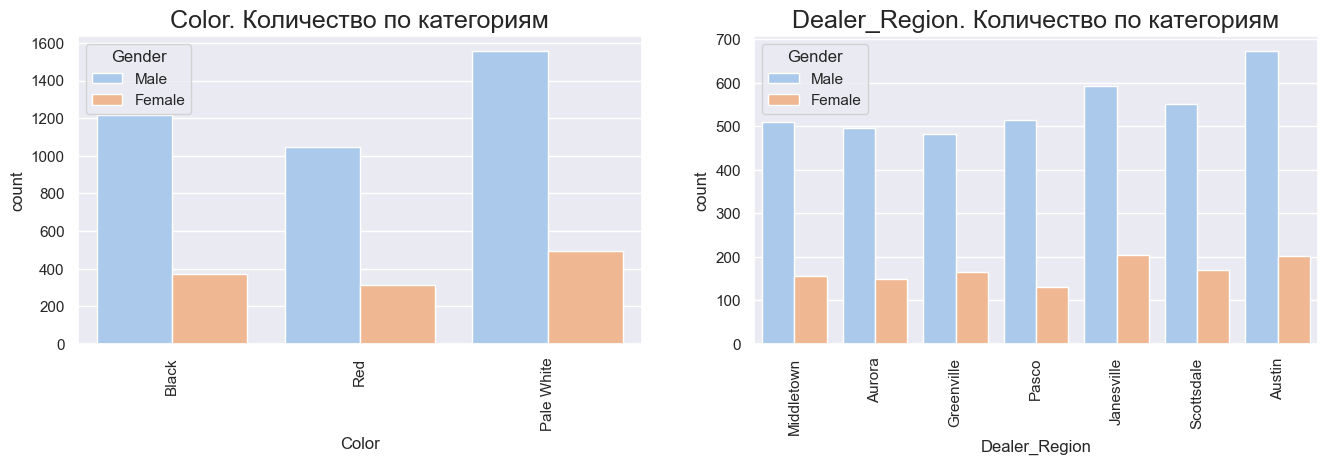

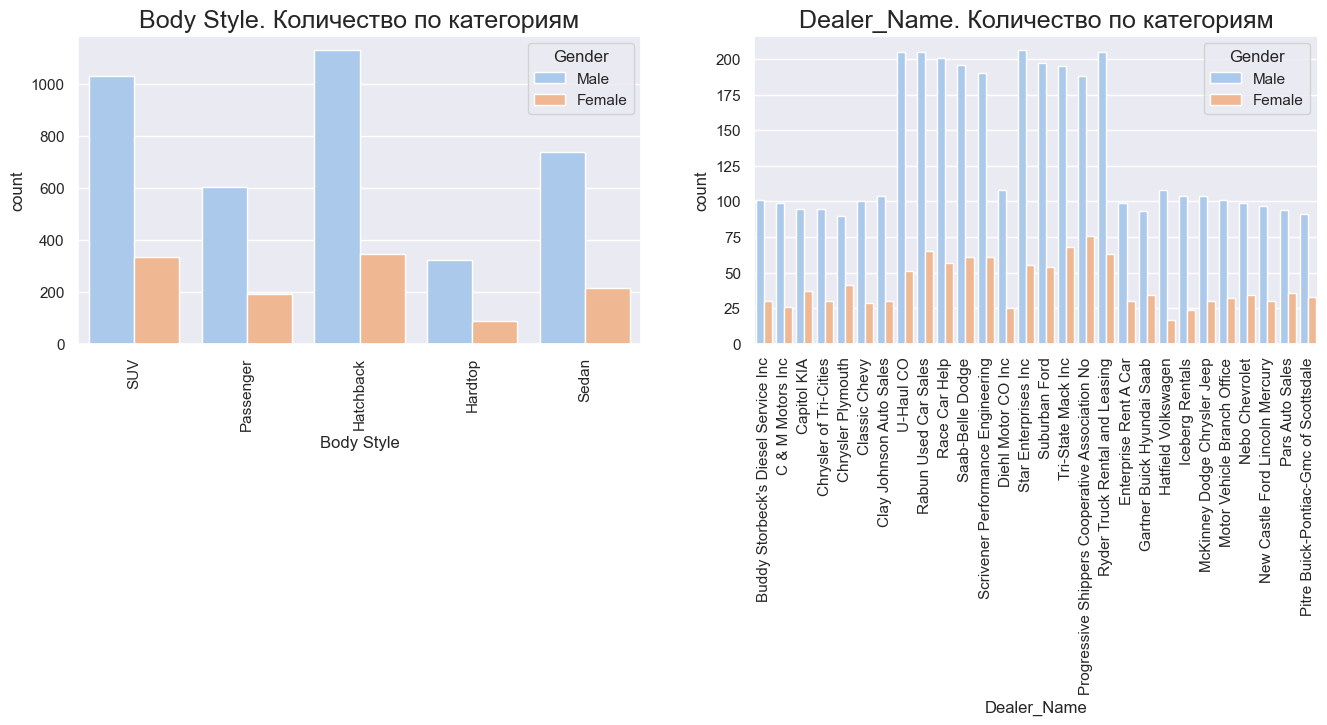

In [19]:
# построим диаграммы по количеству объектов в категориальных признаках
categories = ['Company', 'Transmission','Color','Dealer_Region', 'Body Style', 'Dealer_Name','']
for i in range(len(categories)//2):
              graph_countplot(df, categories[2*i], categories[2*i+1])

# Задача №3

1. Сохранить любую цветную фотографию размером 500x500 пикс в формате *JPEG* (jpg).
2. Загрузить в программу и отобразить фотографию в полноцветном варианте (RGB) и в градациях серого (grayscale). Используйте библиотеку *matplotlib*.

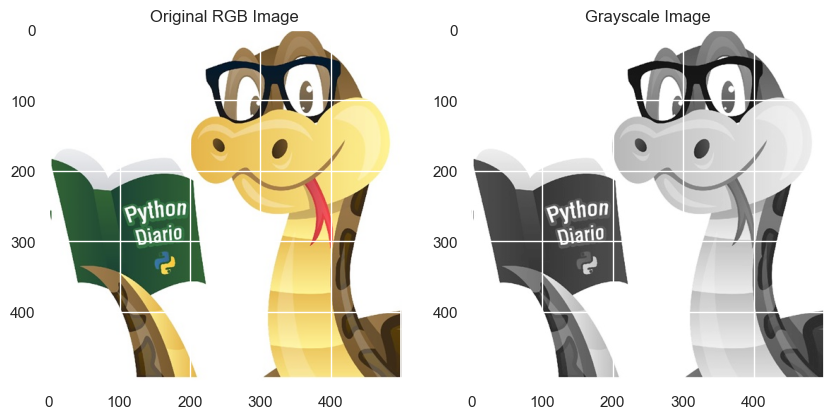

In [20]:
# Загрузка изображения (предполагается, что файл находится в рабочем каталоге)
rgb_image = mpimg.imread('python.jpg')

# значения постоянного веса, присвоенные красному, зеленому и синему соответственно

weights = [0.2989, 0.5870, 0.1140]

# указывает, что для первых двух измерений мы выбираем все элементы
#(обозначаемые операцией ...), а для последнего измерения мы используем операцию среза :,
# чтобы выбрать только первые три элемента, то есть значения красного,
#зеленого и синего каналов

gray_image = np.dot(rgb_image[..., :3], weights)


figure, (left,right) = plt.subplots(1,2,figsize=(10, 5))
left.imshow(rgb_image)
left.set_title('Original RGB Image')

right.imshow(gray_image, cmap='gray')
right.set_title('Grayscale Image')

plt.show()

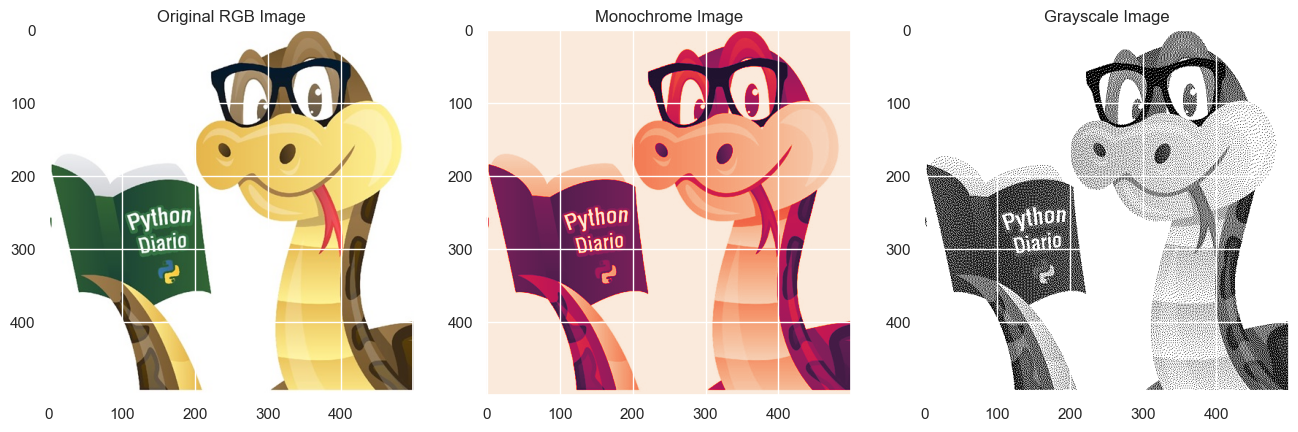

In [21]:
# Вариант использования библиотеки PIL
from PIL import Image

# Открытие изображения из файла
img_color = Image.open('python.jpg')

# Конвертация в оттенки серого
img_gray = img_color.convert('1')

# Конвертация в монохромные оттенки
img_mono = img_color.convert('L')


figure, (left,middle,right) = plt.subplots(1,3,figsize=(16, 8))
left.imshow(img_color)
left.set_title('Original RGB Image')

middle.imshow(img_mono)
middle.set_title('Monochrome Image')

right.imshow(img_gray)
right.set_title('Grayscale Image')

plt.show()